#  Классификация изображений с помощью сверточных нейронных сетей

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/nn.html#convolution-layers
* https://pytorch.org/vision/0.16/transforms.html#v2-api-reference-recommended
* https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
* https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html
* https://kozodoi.me/blog/20210308/compute-image-stats
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html

## Задачи для совместного разбора

1\. Рассмотрите основные возможности по созданию датасетов из `torchvision` и примеры работы основных слоев для создания сверточных нейронных сетей для анализа изображений.

In [2]:
import torch as th
import torch.nn as nn
import torchvision

In [3]:
dset = torchvision.datasets.CIFAR10(
    root="./cifar",
    train=True,
    download=True,
)

100%|██████████| 170498071/170498071 [00:13<00:00, 12379410.99it/s]


Extracting ./cifar/cifar-10-python.tar.gz to ./cifar


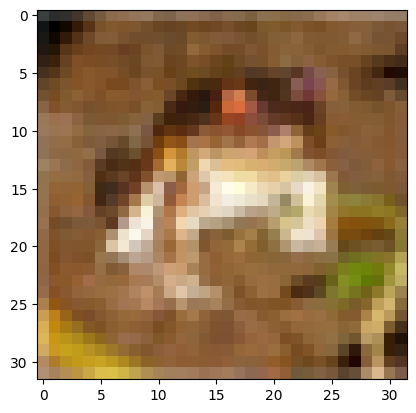

In [4]:
import matplotlib.pyplot as plt
img, label = dset[0]

plt.imshow(img)

In [5]:
import torchvision.transforms.v2 as T

dset = torchvision.datasets.CIFAR10(
    root="./cifar",
    train=True,
    download=True,
    transform=T.Compose(
        [
            T.ToTensor(),
            T.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
        ]
    )
)

print(dset[0][0])

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


Files already downloaded and verified
tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
         [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
         [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
         ...,
         [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
         [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
         [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],

        [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
         [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
         [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
         ...,
         [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
         [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
         [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],

        [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
       

2\. Реализуйте типовую архитектуру CNN для классификации изображений.

In [6]:
dset[0][0].shape

torch.Size([3, 32, 32])

In [7]:
img = dset[0][0]

In [8]:
conv = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3)
out = conv(img)
out.shape

torch.Size([16, 30, 30])

In [9]:
conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3)
out2 = conv2(out)
out2.shape

torch.Size([32, 28, 28])

In [10]:
pool = nn.MaxPool2d(kernel_size=2)
out3 = pool(out2)
out3.shape

torch.Size([32, 14, 14])

In [11]:
model = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3),
    nn.ReLU(),
    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Flatten(start_dim=1), # batch_size x 32*14*14
    nn.Linear(32*14*14, 100),
    nn.ReLU(),
    nn.Linear(100, 10)
)

In [12]:
t = th.rand(16, 32, 14, 14)
t.shape

torch.Size([16, 32, 14, 14])

In [13]:
t1 = t.reshape(16, 32*14*14)
t1.shape

torch.Size([16, 6272])

In [14]:
from torch.utils.data import DataLoader

loader = DataLoader(dset, batch_size=16)
X_b, y_b = next(iter(loader))

In [15]:
X_b.shape

torch.Size([16, 3, 32, 32])

In [16]:
out = model(X_b)
out.shape

torch.Size([16, 10])

In [17]:
y_b

tensor([6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9])

In [18]:
criterion = nn.CrossEntropyLoss()

loss = criterion(out, y_b)
loss

tensor(2.2915, grad_fn=<NllLossBackward0>)

In [19]:
model.parameters()

<generator object Module.parameters at 0x7ab62a994740>

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Создайте датасет `CatBreeds` на основе данных из архива `cat_breeds_4.zip`. Используя преобразования `torchvision`, приведите картинки к размеру 300х300 и нормализуйте значения интенсивности пикселей (рассчитайте статистику для нормализации отдельно). Выведите на экран количество картинок в датасете,  размер одной картинки, количество уникальных классов. Разбейте датасет на обучающее и тестовое множество в соотношении 80 на 20%.

- [ ] Проверено на семинаре

In [20]:
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import zipfile

zip_file_path = '/content/drive/MyDrive/cat_breeds_4.zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()
    zip_ref.close()

In [23]:
transform = T.Compose(
    [
        T.Resize((300, 300)),
        T.ToTensor()
    ]
)

dataset = ImageFolder('cat_breeds_4',transform=transform)

In [24]:
dataset[0][0].shape

torch.Size([3, 300, 300])

In [25]:
import torch as th
import torch
from tqdm import tqdm

In [26]:
psum    = torch.tensor([0.0, 0.0, 0.0])
psum_sq = torch.tensor([0.0, 0.0, 0.0])

for inputs, ans in tqdm(dataset):
    psum += inputs.sum(axis = [1, 2])
    psum_sq += (inputs ** 2).sum(axis = [1, 2])

100%|██████████| 4000/4000 [00:16<00:00, 240.34it/s]


In [27]:
count = 4000 * 300 * 300

In [28]:
total_mean = psum / count
total_std  = th.sqrt(psum_sq / count) - (total_mean ** 2)

In [29]:
print('mean: ', total_mean)
print('std: ', total_std)

mean:  tensor([0.5000, 0.4514, 0.4066])
std:  tensor([0.3156, 0.3164, 0.3159])


In [49]:
transform = T.Compose(
    [
        T.Resize((300, 300)),
        T.ToTensor(),
        T.Normalize(mean=(0.5000, 0.4514, 0.4066), std=(0.3156, 0.3164, 0.3159))
    ]
)

dataset = ImageFolder('cat_breeds_4',transform=transform)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [50]:
print("кол-во картинок",len(dataset))
print("размер", dataset[0][0].shape)
print("кол-во уник классов", len(dataset.classes))

кол-во картинок 4000
размер torch.Size([3, 300, 300])
кол-во уник классов 4


In [51]:
num_classes = len(dataset.classes)
dataset_size = len(dataset)

In [54]:
train_size = int(0.8 * dataset_size)
test_size = dataset_size - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

<p class="task" id="2"></p>

2\. Решите задачу классификации на основе датасета из предыдущего задания, не используя сверточные слои. Постройте график изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи, графики изменения метрики accuracy на обучающем и тестовом множестве в зависимости от эпохи. Выведите на экран итоговое значение метрики accuracy на обучающем и тестовом множестве. Выведите на экран количество параметров модели.   

- [ ] Проверено на семинаре

In [68]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [69]:
n_epochs = 12
learning_rate = 0.1

model = nn.Linear(3 * 300 * 300, len(dataset.classes))

In [70]:
train_accuracy_history = []
test_accuracy_history = []
loss_history = []

In [71]:
criterion = nn.CrossEntropyLoss().cuda()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [72]:
import numpy as np

In [73]:
for epoch in range(n_epochs):
    train_correct = 0
    train_total = 0
    epoch_loss = []

    # Обучение
    for images, labels in train_loader:
        images = images.view(-1, 3 * 300 * 300)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Расчет точности на обучающем множестве
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
        epoch_loss.append(loss.item())

    mean_loss = np.mean(epoch_loss)
    print(f"Epoch [{epoch + 1}/{n_epochs}] - Loss: {mean_loss}")

    train_accuracy = 100 * train_correct / train_total
    train_accuracy_history.append(train_accuracy)

    model.eval()
    test_correct = 0
    test_total = 0
    for images, labels in test_loader:
        images = images.view(-1, 3 * 300 * 300)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

    test_accuracy = 100 * test_correct / test_total
    test_accuracy_history.append(test_accuracy)
    loss_history.append(mean_loss)

Epoch [1/12] - Loss: 471.6029358959198
Epoch [2/12] - Loss: 387.5025079345703
Epoch [3/12] - Loss: 382.82324371337893
Epoch [4/12] - Loss: 355.14287231445314
Epoch [5/12] - Loss: 313.7731069946289
Epoch [6/12] - Loss: 320.30728790283206
Epoch [7/12] - Loss: 262.1389720153809
Epoch [8/12] - Loss: 257.9747087097168
Epoch [9/12] - Loss: 242.05899291992188
Epoch [10/12] - Loss: 207.0914584350586
Epoch [11/12] - Loss: 235.58169143676758
Epoch [12/12] - Loss: 222.92729934692383


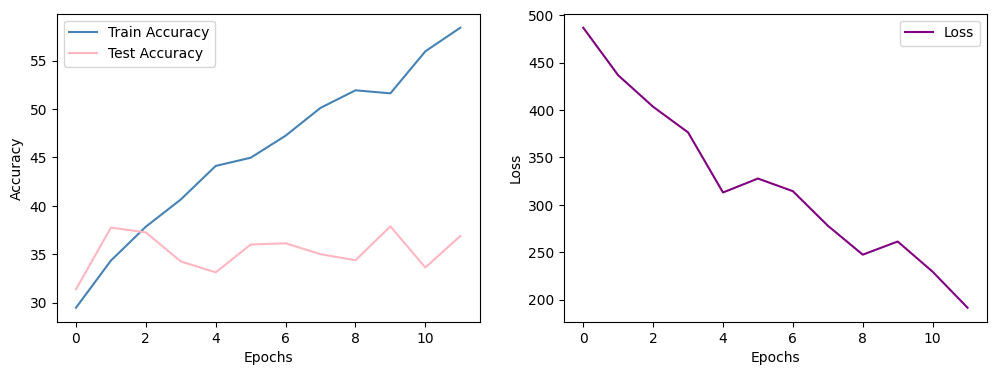

In [45]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(n_epochs), train_accuracy_history, label='Train Accuracy', color='steelblue')
plt.plot(range(n_epochs), test_accuracy_history, label='Test Accuracy', color='lightpink')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(n_epochs), loss_history, label='Loss', color='purple')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [46]:
final_train_accuracy = 100 * train_correct / train_total
final_test_accuracy = 100 * test_correct / test_total

print("train", final_train_accuracy,'%')
print('test', final_test_accuracy,'%')


train 58.40625 %
test 36.875 %



<p class="task" id="3"></p>

3\. Напишите функцию, которая выбирает несколько изображений из переданного набора данных и выводит их на экран в виде сетки с указанием над ними названия правильного класса и класса, предсказанного моделью. Воспользовавшись данной функцией, выведите прогнозы итоговой модели из предыдущей задачи по 6 случайным картинкам.

```
def show_examples(model, dataset, k=6):
    pass
```

- [ ] Проверено на семинаре

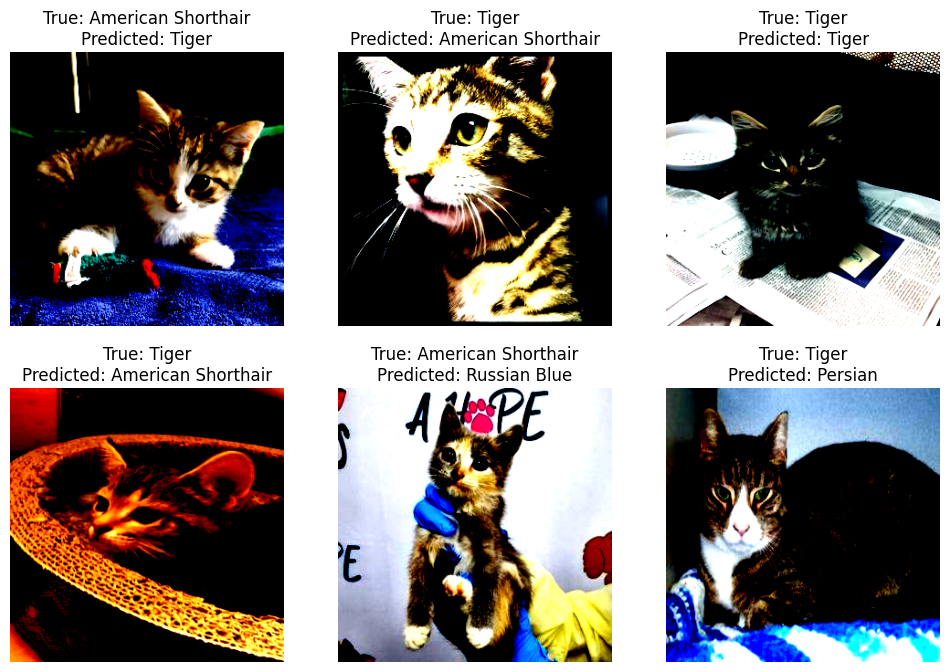

In [47]:
import random

def show_examples(model, dataset, k=6):
    sample_indices = random.sample(range(len(dataset)), k)
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))

    for i, idx in enumerate(sample_indices):
        image, true_label = dataset[idx]
        with torch.no_grad():
            predicted = model(image.view(1, -1))
            pred_label = torch.argmax(predicted, 1).item()

        axes[i // 3, i % 3].imshow(image.permute(1, 2, 0))
        axes[i // 3, i % 3].set_title(f"True: {dataset.dataset.classes[true_label]}\nPredicted: {dataset.dataset.classes[pred_label]}")
        axes[i // 3, i % 3].axis('off')

    plt.show()


show_examples(model, test_dataset, k=6)


<p class="task" id="4"></p>

4\. Решите задачу классификации на основе датасета из первого задания, используя сверточные слои. Постройте график изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи, графики изменения метрики accuracy на обучающем и тестовом множестве в зависимости от эпохи. Выведите на экран итоговое значение метрики accuracy на обучающем и тестовом множестве. Выведите на экран количество параметров модели. Воспользовавшись функцией из предыдущего задания, выведите прогнозы итоговой модели по 6 случайным картинкам.

- [ ] Проверено на семинаре

In [62]:
import torch.nn as nn

class ConvNet(nn.Module):
    def __init__(self, num_classes):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(32 * 75 * 75, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = ConvNet(num_classes=len(dataset.classes)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, pin_memory=True)

n_epochs = 5
train_losses = []
train_accs = []
test_accs = []

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    train_losses.append(running_loss)
    train_accs.append(train_accuracy)

    model.eval()
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracy = 100 * correct_test / total_test
    test_accs.append(test_accuracy)



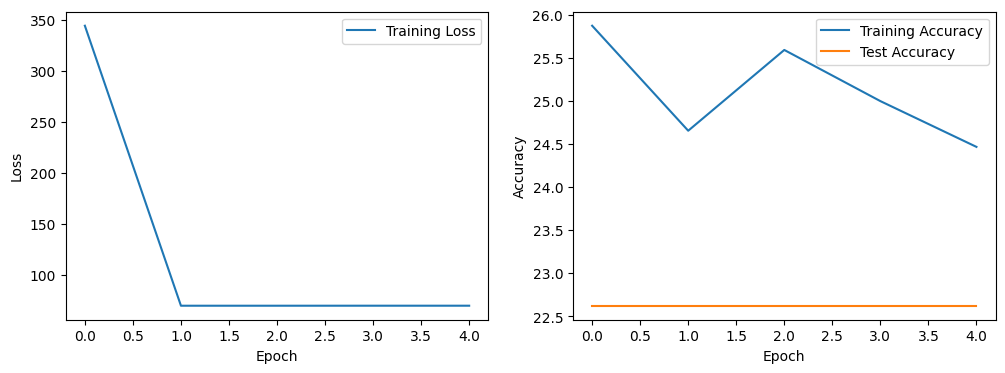

In [64]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(n_epochs), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(n_epochs), train_accs, label='Training Accuracy')
plt.plot(range(n_epochs), test_accs, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [65]:
print("Training Accuracy", train_accs[-1])
print("Test Accuracy", test_accs[-1])

Training Accuracy 24.46875
Test Accuracy 22.625


<p class="task" id="5"></p>

5\. Проанализируйте обученную в предыдущей задаче модель, исследовав обученные ядра сверточных слоев. Выберите одно изображение из тестового набора данных и пропустите через первый сверточный слой модели. Визуализируйте полученные карты признаков.

- [ ] Проверено на семинаре

## Обратная связь
- [ ] Хочу получить обратную связь по решению